Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE).

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
class change_to_datetime(BaseEstimator, TransformerMixin):
    def __init__(self, column_name=None):
        self.column_name = column_name
        
    def fit(self, df_X, y=None):
        return self
    
    def transform(self, df_X):
        df_X[self.column_name] = pd.to_datetime(df_X[self.column_name])
        return df_X

- 년, 월, 일, 시간으로 나누는 변환기

- 요일 나누는 변환기

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [8]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [10]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [11]:
data = train.copy()

In [12]:
column_name = 'datetime'
change = change_to_datetime(column_name)
data = change.transform(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [13]:
data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day
data["hour"] = data["datetime"].dt.hour

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 1.3 MB


In [15]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A23AE6DD8>,
      dtype=object)

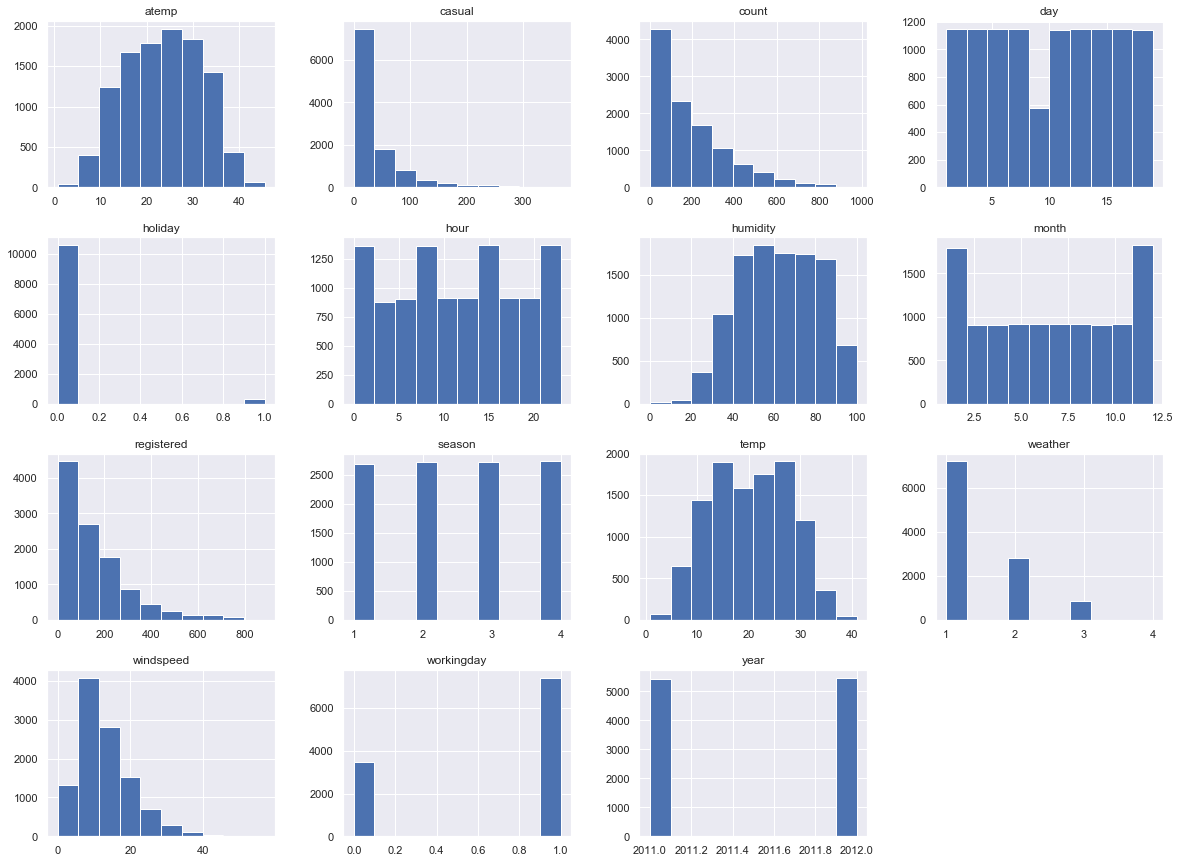

In [16]:
data.hist(figsize=(20,15))

In [17]:
corr_matrix = data.corr()
corr_matrix

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


In [18]:
corr_matrix['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

In [19]:
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

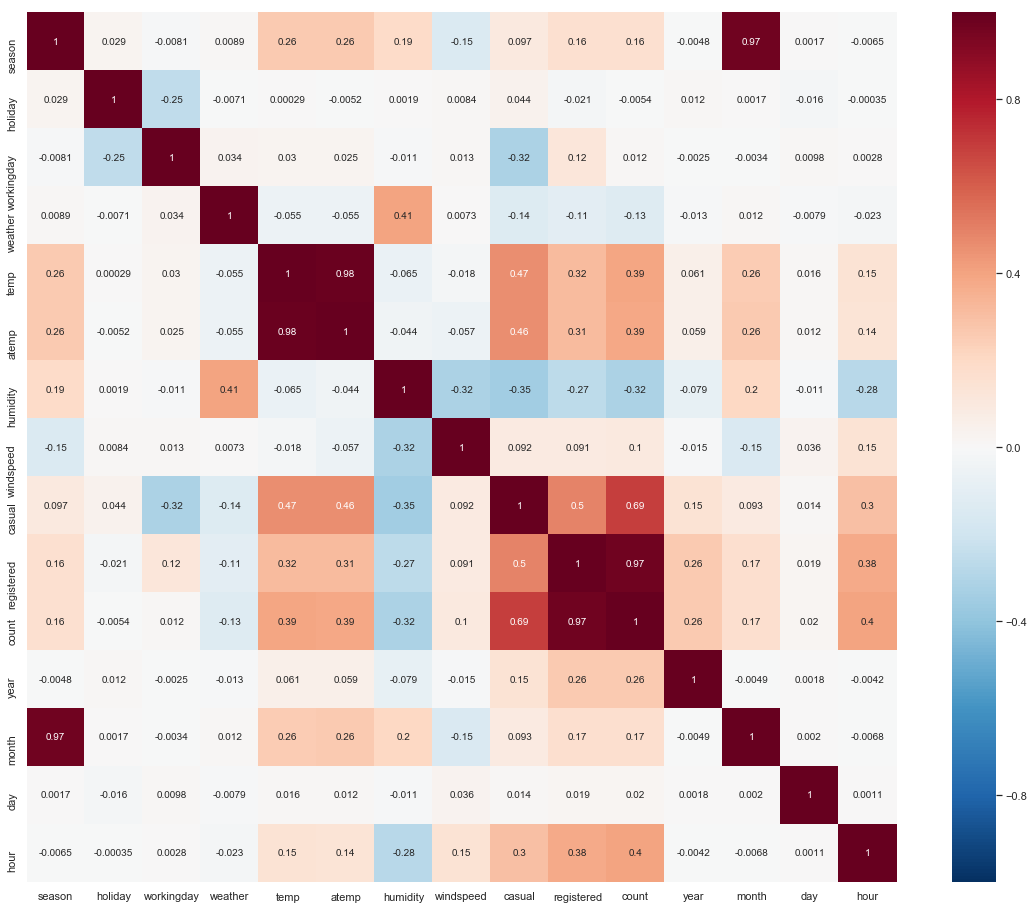

In [20]:
fig, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, square=True, cbar=True, ax=ax1)

- season과 month는 상관관계가 높아 둘 중 하나만 사용해야 한다.
- temp와 atemp 역시 하나만 사용하도록 한다.

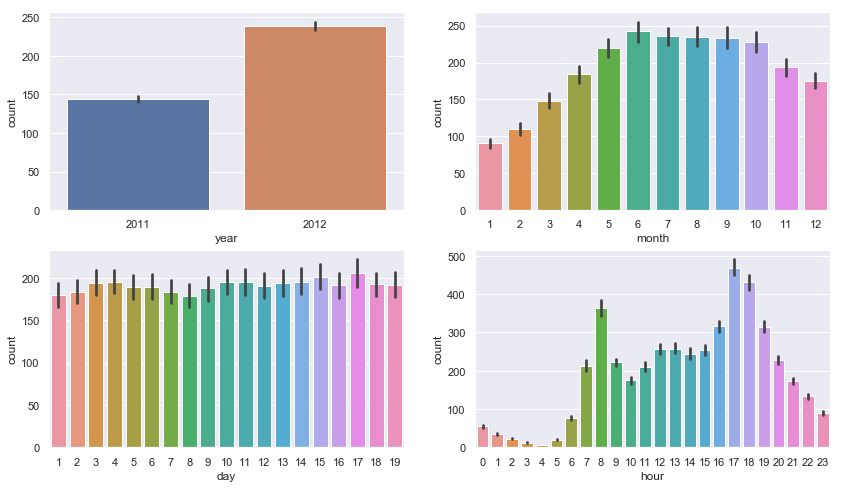

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.barplot(data=data, x='year', y='count', ax=ax1)
sns.barplot(data=data, x='month', y='count', ax=ax2)
sns.barplot(data=data, x='day', y='count', ax=ax3)
sns.barplot(data=data, x='hour', y='count', ax=ax4)

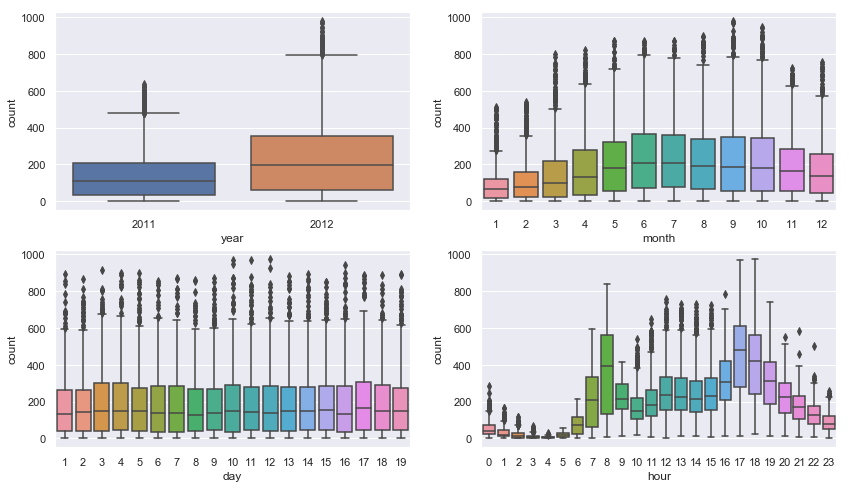

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.boxplot(data=data, x='year', y='count', ax=ax1)
sns.boxplot(data=data, x='month', y='count', ax=ax2)
sns.boxplot(data=data, x='day', y='count', ax=ax3)
sns.boxplot(data=data, x='hour', y='count', ax=ax4)

- day는 feature로 사용하기 어려움

In [23]:
data.groupby('year')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,5422.0,144.223349,133.312123,1.0,32.0,111.0,210.0,638.0
2012,5464.0,238.560944,208.114003,1.0,59.0,199.0,354.0,977.0


In [24]:
data.groupby('month')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,884.0,90.366516,95.302518,1.0,20.00,65.0,123.00,512.0
2,901.0,110.003330,109.802322,1.0,26.00,78.0,157.00,539.0
3,901.0,148.169811,155.352814,1.0,26.00,100.0,219.00,801.0
4,909.0,184.160616,182.417619,1.0,35.00,133.0,277.00,822.0
5,912.0,219.459430,189.320173,1.0,56.00,182.0,323.50,873.0
6,912.0,242.031798,199.628690,1.0,73.75,206.0,363.00,869.0
7,912.0,235.325658,184.857337,1.0,77.25,209.5,358.50,872.0
8,912.0,234.118421,197.198461,1.0,67.75,193.0,337.25,897.0
9,909.0,233.805281,208.915910,1.0,58.00,188.0,349.00,977.0


In [25]:
data.groupby('hour')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


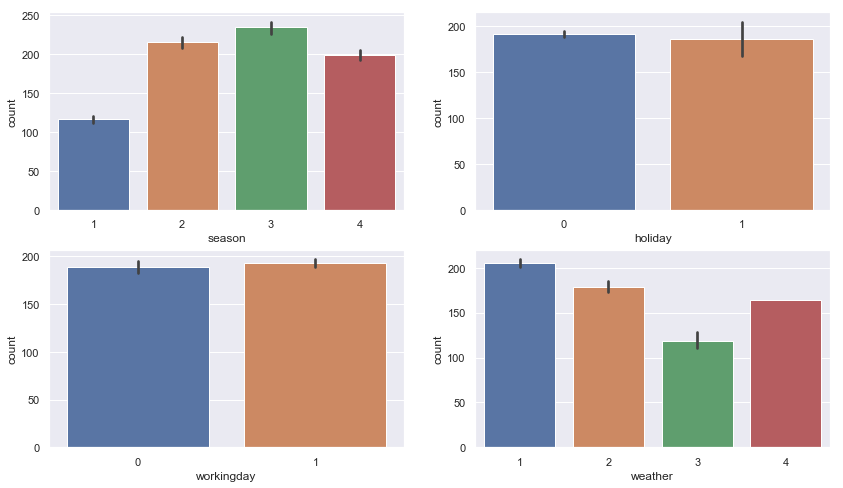

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.barplot(data=data, x='season', y='count', ax=ax1)
sns.barplot(data=data, x='holiday', y='count', ax=ax2)
sns.barplot(data=data, x='workingday', y='count', ax=ax3)
sns.barplot(data=data, x='weather', y='count', ax=ax4)

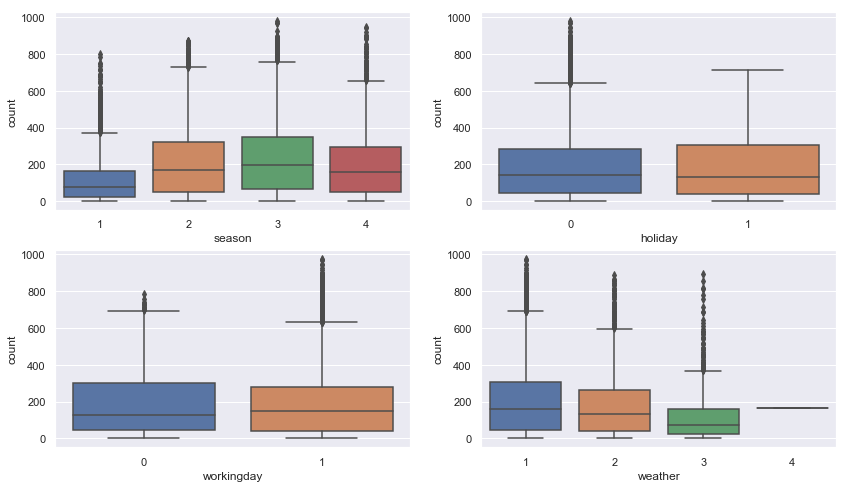

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.boxplot(data=data, x='season', y='count', ax=ax1)
sns.boxplot(data=data, x='holiday', y='count', ax=ax2)
sns.boxplot(data=data, x='workingday', y='count', ax=ax3)
sns.boxplot(data=data, x='weather', y='count', ax=ax4)

In [28]:
data.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [29]:
data.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [30]:
data.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


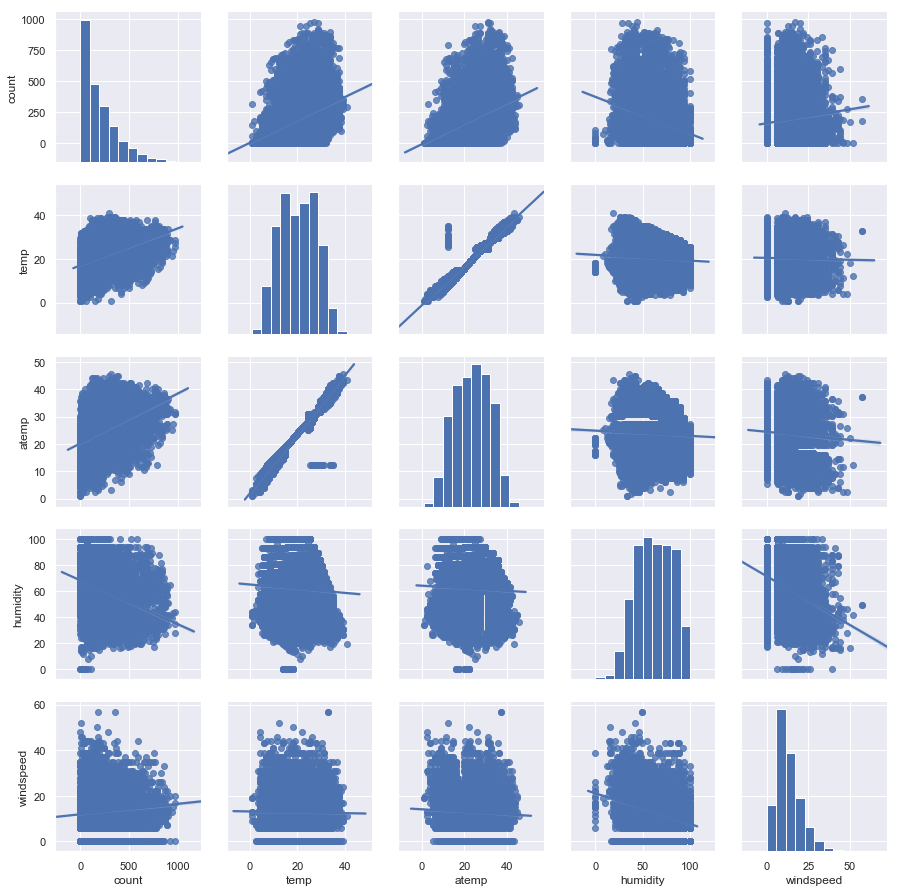

In [31]:
columns = ['count', 'temp', 'atemp', 'humidity', 'windspeed']
sns.pairplot(data, vars=columns, kind='reg')

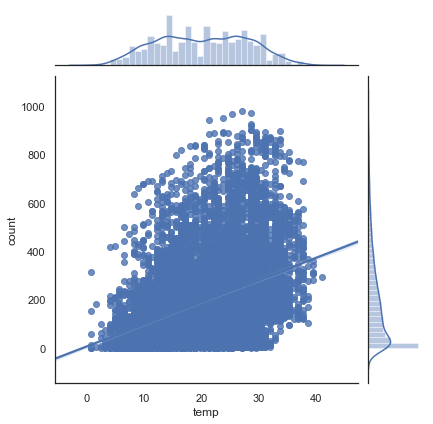

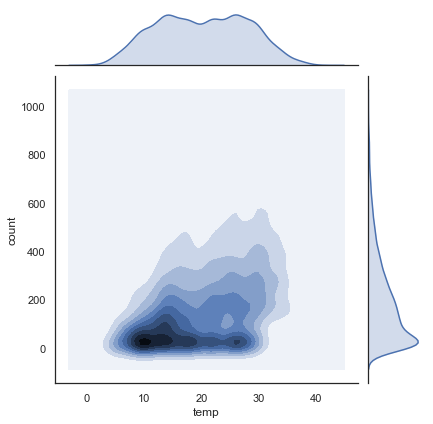

In [32]:
with sns.axes_style('white') :
    sns.jointplot(data=data, x='temp', y='count', kind='reg')

with sns.axes_style('white') :
    sns.jointplot(data=data, x='temp', y='count', kind='kde')

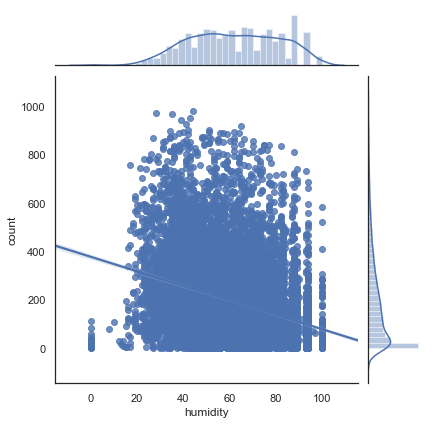

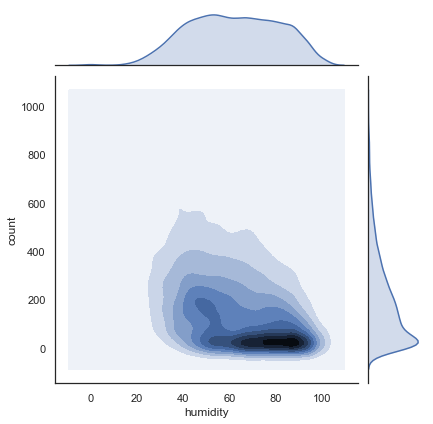

In [33]:
with sns.axes_style('white') :
    sns.jointplot(data=data, x='humidity', y='count', kind='reg')

with sns.axes_style('white') :
    sns.jointplot(data=data, x='humidity', y='count', kind='kde')

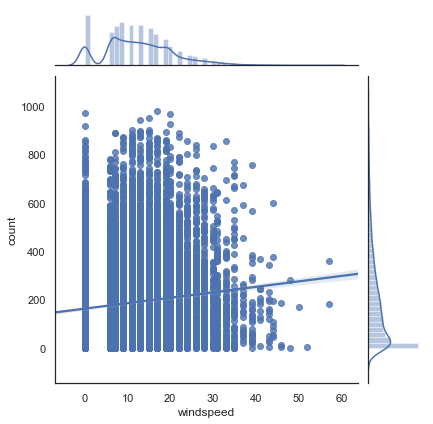

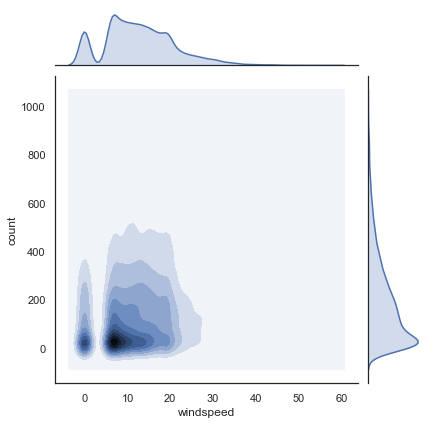

In [34]:
with sns.axes_style('white') :
    sns.jointplot(data=data, x='windspeed', y='count', kind='reg')

with sns.axes_style('white') :
    sns.jointplot(data=data, x='windspeed', y='count', kind='kde')

- windspeed의 분포가 의심스러움
- 0만 따로 뚝 떨어진 느낌

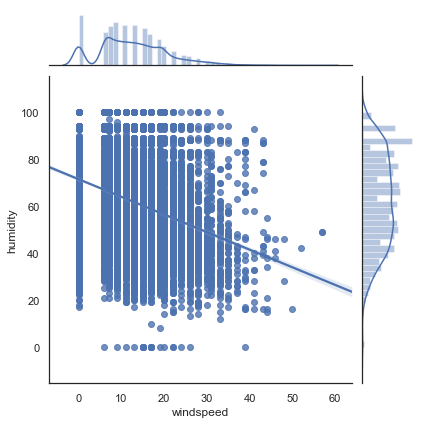

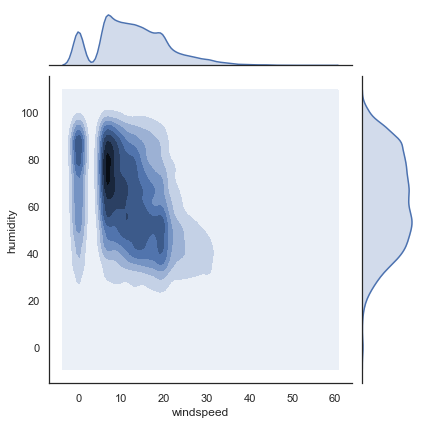

In [35]:
with sns.axes_style('white') :
    sns.jointplot(data=data, x='windspeed', y='humidity', kind='reg')

with sns.axes_style('white') :
    sns.jointplot(data=data, x='windspeed', y='humidity', kind='kde')

In [36]:
data["dayofweek"] = data["datetime"].dt.dayofweek   # 요일로 바꾸어 줌, Monday = 0, Sunday = 6
data["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

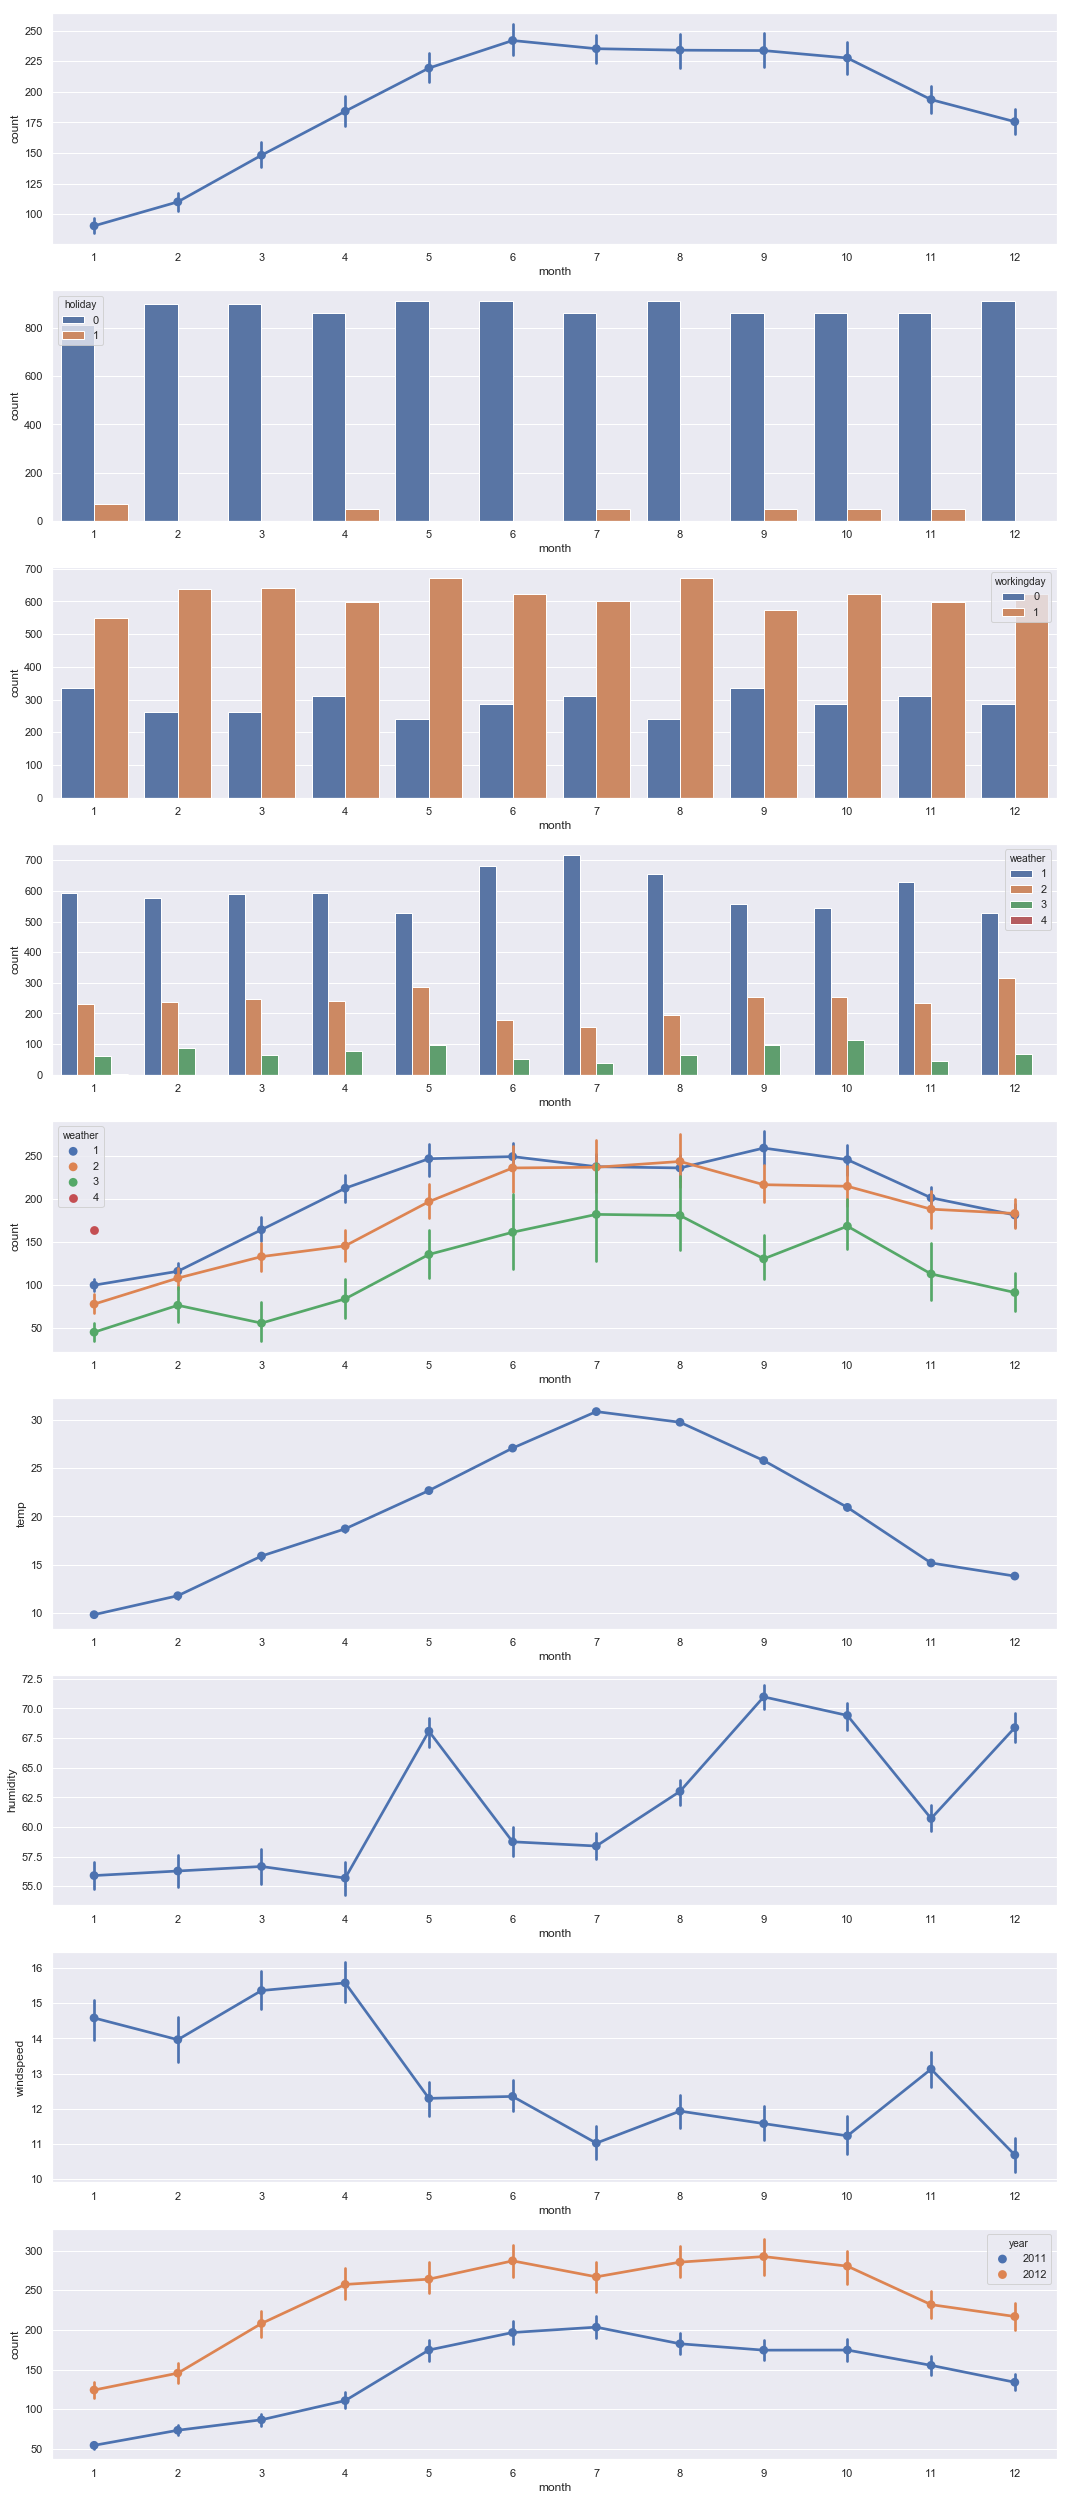

In [37]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9)= plt.subplots(nrows=9, figsize=(18,45))
sns.pointplot(data=data, x="month", y="count", ax=ax1)
sns.countplot(data=data, x="month", hue="holiday", ax=ax2)
sns.countplot(data=data, x="month", hue="workingday", ax=ax3)
sns.countplot(data=data, x="month", hue="weather", ax=ax4)
sns.pointplot(data=data, x="month", y="count", hue="weather", ax=ax5)
sns.pointplot(data=data, x="month", y="temp", ax=ax6)
sns.pointplot(data=data, x="month", y="humidity", ax=ax7)
sns.pointplot(data=data, x="month", y="windspeed", ax=ax8)
sns.pointplot(data=data, x="month", y="count", hue="year", ax=ax9)

- month는 holiday, workingday와는 상관 없음
- season이 1일 때, weather가 더 좋은 날의 비율이 더 높지만, weather이 좋은 날에도 통행량이 적었음

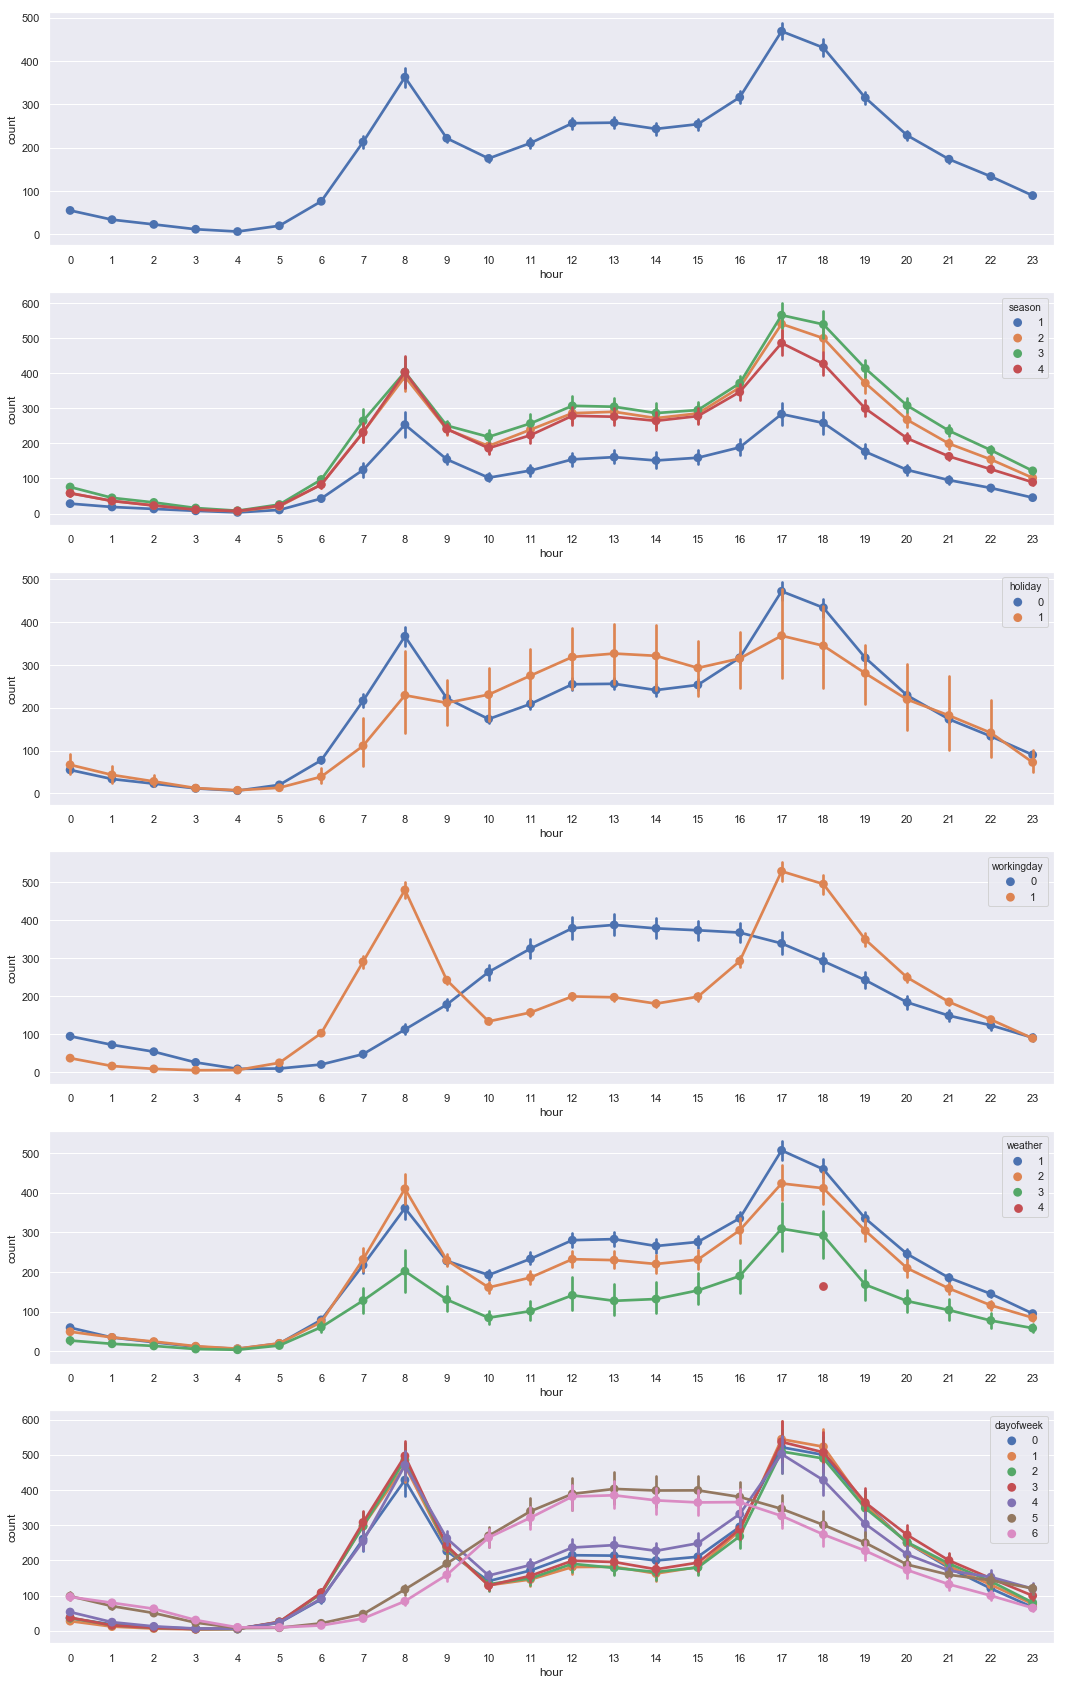

In [38]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6)= plt.subplots(nrows=6, figsize=(18,30))
sns.pointplot(data=data, x="hour", y="count", ax=ax1)
sns.pointplot(data=data, x="hour", y="count", hue="season", ax=ax2)
sns.pointplot(data=data, x="hour", y="count", hue="holiday", ax=ax3)
sns.pointplot(data=data, x="hour", y="count", hue="workingday", ax=ax4)
sns.pointplot(data=data, x="hour", y="count", hue="weather", ax=ax5)
sns.pointplot(data=data, x="hour", y="count", hue="dayofweek", ax=ax6)

- season, weather에 따른 통행량 차이는 앞선 본 boxplot과 같은 경향을 보임
- 주중에는 출퇴근 시간에 통행량이 높음
- 주말에는 오후 시간에 통행량이 높음

In [39]:
# data Without Outliers
data_wo_outlier = data[abs(data["count"] - data["count"].mean()) <= (3 * data["count"].std())]

print(data.shape)
print(data_wo_outlier.shape)

(10886, 17)
(10739, 17)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.        , 0.        , 0.        , ..., 6.59578051, 6.5971457 ,
         6.59850903])),
 (1.4096846101542908, 4.523106928071492, 0.9537631807794263))

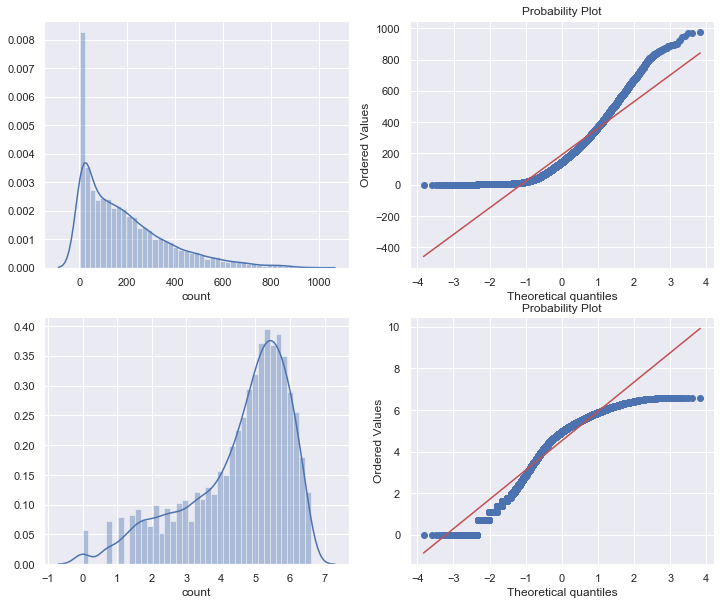

In [40]:
# count값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(data["count"], ax=axes[0][0])
stats.probplot(data["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(data_wo_outlier["count"]), ax=axes[1][0])
stats.probplot(np.log(data_wo_outlier["count"]), dist='norm', fit=True, plot=axes[1][1])

- 정규 분포를 따르지 않는 데이터 샘플을 Q-Q 플롯으로 그리면 직선이 아닌 휘어진 형태로 나타난다.

In [41]:
data[data['hour'] == 8][['holiday', 'workingday', 'dayofweek']]

,holiday,workingday,dayofweek
8,0,0,5
31,0,0,6
53,0,1,0
76,0,1,1
99,0,1,2
122,0,1,3
145,0,1,4
169,0,0,5
193,0,0,6
217,0,1,0


In [42]:
data[(data['hour'] == 8) & (data['holiday'] == 1)][['holiday', 'workingday', 'dayofweek']]

,holiday,workingday,dayofweek
380,1,0,0
1666,1,0,4
2770,1,0,0
3706,1,0,0
4279,1,0,0
4758,1,0,4
5453,1,0,0
5788,1,0,0
7151,1,0,0
8231,1,0,2
